##  Praca domowa nr 1 z wstępu do uczenia maszynowego
### Malwina Wojewoda i Jakub Piwko

#### Pakiety

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

#### Dane i ich opis

In [158]:
credit_df = pd.read_csv('german_credit_data_dataset.csv')
credit_df.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2


In [159]:
descr = pd.read_csv('attributes_german_credit_data.csv')
descr

,name,type,description
0,checking_account_status,string,Status of existing checking account (A11: < 0 ...
1,duration,integer,Duration in month
2,credit_history,string,A30: no credits taken/ all credits paid back d...
3,purpose,string,"Purpose of Credit (A40 : car (new), A41 : car ..."
4,credit_amount,float,NaN
5,savings,string,"Savings in accounts/bonds (A61 : < 100 DM, A62..."
6,present_employment,string,"A71 : unemployed, A72 : < 1 year, A73 : 1 <= x..."
7,installment_rate,float,Installment Rate in percentage of disposable i...
8,personal,string,Personal Marital Status and Sex (A91 : male : ...
9,other_debtors,string,"A101 : none, A102 : co-applicant, A103 : guara..."


#### Podział na zbiór treningowy, testowy i walidacyjny

In [176]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
X, X_valid = sklearn.model_selection.train_test_split(
    credit_df,
    test_size=0.30, random_state=100)

#Wyróżnienie zbioru treningowego i testowego
X_train, X_test = sklearn.model_selection.train_test_split(
    X,
    test_size=0.30, random_state=100)

#### Weryfikacja proporcji zmiennych kategorycznych (???)

Sprawdzamy, czy rozkłady zmiennych kategorycznych w naszych wydzielonych zbiorach różnią się znacząco.

In [177]:
X_train["savings"].value_counts()/np.shape(X_train)[0]

A61    0.626531
A65    0.183673
A62    0.085714
A63    0.053061
A64    0.051020
Name: savings, dtype: float64

In [178]:
X_test["savings"].value_counts()/np.shape(X_test)[0]

A61    0.580952
A65    0.204762
A62    0.090476
A63    0.080952
A64    0.042857
Name: savings, dtype: float64

In [179]:
X_valid["savings"].value_counts()/np.shape(X_valid)[0]

A61    0.580000
A65    0.166667
A62    0.140000
A63    0.066667
A64    0.046667
Name: savings, dtype: float64

#### Zapoznanie z danymi

In [164]:
X_train.head(10)

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
797,A14,12,A34,A42,1258.0,A61,A72,2.0,A92,A101,...,A122,22.0,A143,A151,2.0,A172,1,A191,A201,1
331,A14,18,A34,A46,1864.0,A62,A73,4.0,A92,A101,...,A121,30.0,A143,A152,2.0,A173,1,A191,A201,2
302,A13,24,A34,A40,1344.0,A65,A74,4.0,A93,A101,...,A121,37.0,A141,A152,2.0,A172,2,A191,A201,2
470,A12,24,A32,A43,3092.0,A62,A72,3.0,A94,A101,...,A123,22.0,A143,A151,1.0,A173,1,A192,A201,2
597,A12,24,A30,A49,4241.0,A61,A73,1.0,A93,A101,...,A121,36.0,A143,A152,3.0,A172,1,A192,A201,2
228,A14,9,A32,A43,1478.0,A61,A74,4.0,A93,A101,...,A123,22.0,A143,A152,1.0,A173,1,A191,A201,2
234,A14,4,A34,A43,1544.0,A61,A74,2.0,A93,A101,...,A121,42.0,A143,A152,3.0,A172,2,A191,A201,1
708,A12,9,A32,A43,1206.0,A61,A75,4.0,A92,A101,...,A121,25.0,A143,A152,1.0,A173,1,A191,A201,1
535,A13,21,A34,A46,2319.0,A61,A72,2.0,A91,A101,...,A123,33.0,A143,A151,1.0,A173,1,A191,A201,2
815,A12,36,A33,A40,7432.0,A61,A73,2.0,A92,A101,...,A122,54.0,A143,A151,1.0,A173,1,A191,A201,1


In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 797 to 987
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  448 non-null    object 
 1   duration                 448 non-null    int64  
 2   credit_history           448 non-null    object 
 3   purpose                  448 non-null    object 
 4   credit_amount            448 non-null    float64
 5   savings                  448 non-null    object 
 6   present_employment       448 non-null    object 
 7   installment_rate         448 non-null    float64
 8   personal                 448 non-null    object 
 9   other_debtors            448 non-null    object 
 10  present_residence        448 non-null    float64
 11  property                 448 non-null    object 
 12  age                      448 non-null    float64
 13  other_installment_plans  448 non-null    object 
 14  housing                 

W ramce danych nie wystąpują wartości None/Null. Z opisu ramki, wiemy, że takowe braki, jeśli występują, są zakodowane odpowiednimi wartościami w kolumnach, więc nie musimy przejmować się uzupełnianiem brakujących wartości. Większość zmiennych jest dyskretna. Można natomiast wyróżnić kolumny "age", "credit_amount" i "duration" jako typowo ciągłe. Na początek przenalizujemy właśnie te zmienne. 

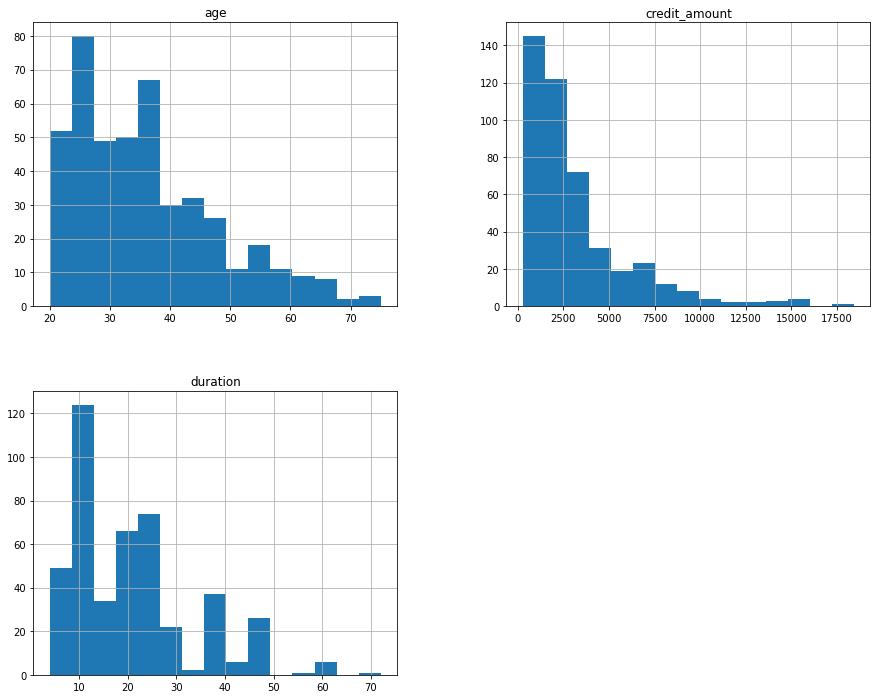

In [166]:
#Rozkłady zmiennych ciągłych
Cont_vars = ["age", "credit_amount", "duration"]
X_train[Cont_vars].hist(bins = 15, figsize = (15,12))
plt.show()

Wśród osób ubiegających się o kredyt występują zdecydowanie częściej osoby młodsze, starające się o mniejszą kwotę kredytu.  

In [ ]:
X_train["customer_type"]

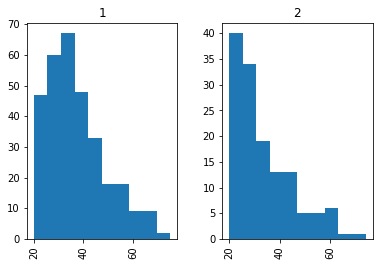

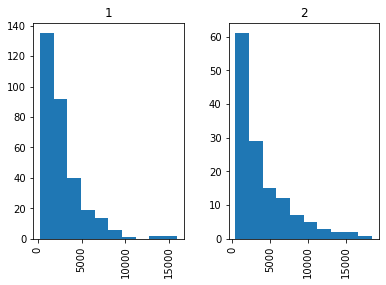

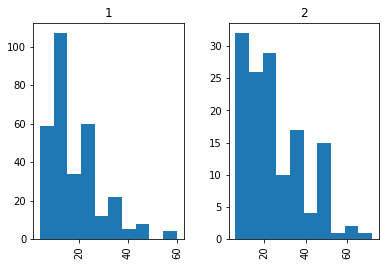

In [175]:
#X_train[X_train["customer_type"] == 1][Cont_vars].hist(figsize = (8,6))
#X_train[X_train["customer_type"] == 1][Cont_vars].hist()

for name in Cont_vars:
    X_train[name].hist(by = X_train["customer_type"])
plt.show()